# Slice Analysis

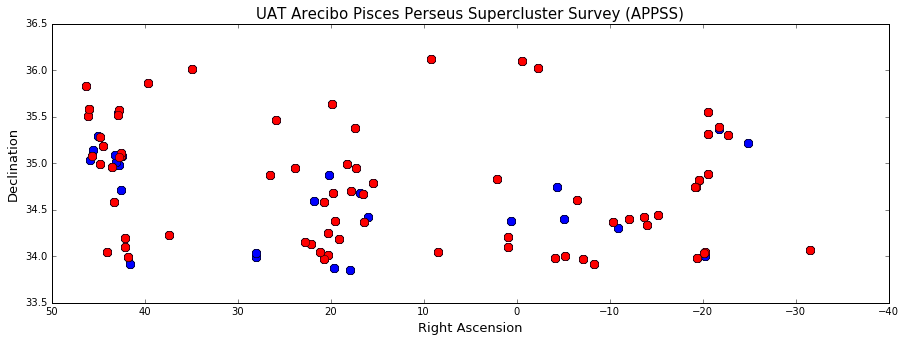

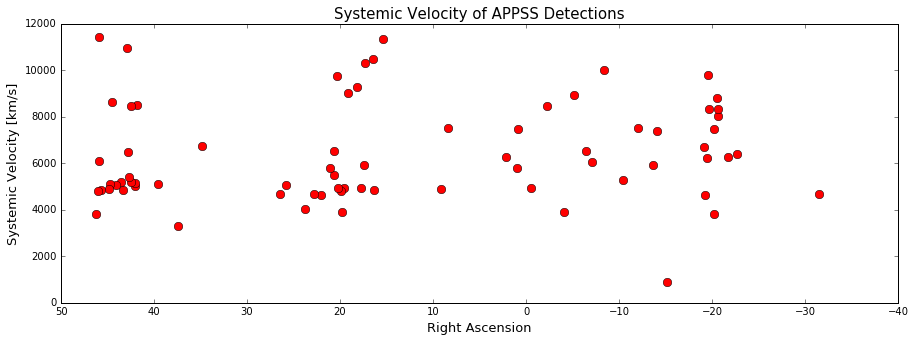

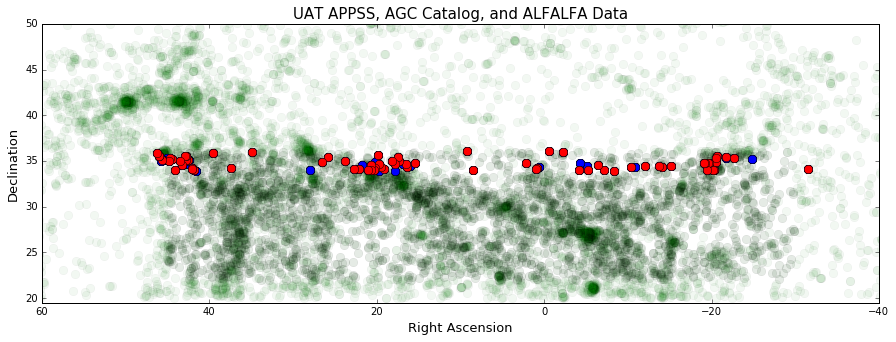

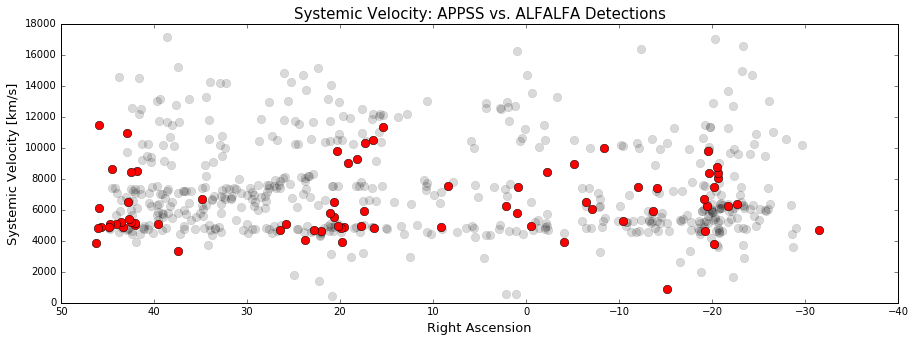

In [2]:
#insert these functions at the beginning, they will not need to be repeated in different cells since they are here
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import pylab #pylab allows you to put range on x and y axis 
%matplotlib inline 


data_appss=ascii.read("slice_35_new.csv") #read in the appss data
data_alf=ascii.read("alf_data.csv")#read in alfalfa data
data_agc=ascii.read("AGC_CAT.csv") #catalog from UAT Page 

str_src_name=data_appss[1][:] #srcname columm, [1] shows what column we are pulling data from 

ra_hrdeg = list(str_src_name)   #these six lines convert these values into a list
ra_mindeg = list(str_src_name)
ra_secdeg = list(str_src_name)

dec_degdeg = list(str_src_name)
dec_mindeg = list(str_src_name)
dec_secdeg = list(str_src_name)

for i in range(len(ra_hrdeg)):

    #convert RA to decimal degrees
    
    ra_hrdeg[i] = float(str_src_name[i][1:3])*15.
    ra_mindeg[i] = float(str_src_name[i][3:5])*15./60.
    ra_secdeg[i] = float(str_src_name[i][5:9])*15./3600.

    #do same for DEC 
    
    dec_degdeg[i] = float(str_src_name[i][10:12])#take section you need 
    dec_mindeg[i] = float(str_src_name[i][12:14])/60. 
    dec_secdeg[i] = float(str_src_name[i][14:])/3600.
    
ra_deg=np.add(np.add(ra_hrdeg,ra_mindeg),ra_secdeg)
dec_deg=np.add(np.add(dec_degdeg, dec_mindeg), dec_secdeg)

for i in range(len(ra_deg)): #keep it in this range where the RA is positive and negative
    if ra_deg[i] > 180.:
        ra_deg[i] = ra_deg[i]-360. 
        
#now that it is converted into decimal degrees, we can use it to make different graphs 
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''        

v_sys=data_appss['Vsys'] # pull velocity data from the slice

#These 'good' values are defined as having systemic velocities greater than 0 km/s
good_v_sys= v_sys[(v_sys > 0)]
good_ra= ra_deg[(v_sys > 0)]
good_dec= dec_deg[(v_sys > 0)]

#plots the detections vs. nondetections of your slice as a scatter plot
plt.figure(figsize=(15,5)) #this figsize gives the traditional RA vs DEC dimensions of a graph
plt.gca().invert_xaxis()  #flipping the x axis 
plt.plot(ra_deg,dec_deg,'bo', markersize=8.5) #list x, y variables, blue cirlces are nondetections
plt.plot(good_ra,good_dec,'ro',markersize=8.5) #red circles define detection, markersize makes the dots larger
plt.title("UAT Arecibo Pisces Perseus Supercluster Survey (APPSS)", fontsize= 15) #title and font size
plt.xlabel("Right Ascension", fontsize=13) #label x 
plt.ylabel("Declination", fontsize=13)   #label y

fig1 = plt.gcf() #define the figure so that you can save it 
plt.show()
plt.draw()

#fig1.savefig('just_appss.pdf') #uncomment this so that you can have it save 

#plots the nonzero velocities of your slice vs the right ascension as a scatter plot 
plt.figure(figsize=(15,5))
plt.gca().invert_xaxis()
plt.plot(good_ra,good_v_sys,'ro', markersize= 8.5) #these are all detections and their calculated systemic velocity
plt.title("Systemic Velocity of APPSS Detections", fontsize= 15)
plt.xlabel("Right Ascension", fontsize=13)
plt.ylabel("Systemic Velocity [km/s]", fontsize=13)

fig2 = plt.gcf()
#fig2.savefig('RA_vs_Vsys.pdf') #uncomment this so that you can have it save 

#read in the alfalfa data
RA_alf=data_alf["wrapradeg"] 
Dec_alf=data_alf["usedecdeg"]

#read in the AGC catalog

RA_agc=data_agc["rawrap"] 
Dec_agc=data_agc["decdeg"]


#read in the AGC values you want
good_dec_agc= Dec_agc[(Dec_agc >= 33.5) & (Dec_agc <= 36.5)] 
good_ra_agc= RA_agc[(Dec_agc >= 33.5) & (Dec_agc <= 36.5)]

#make sure to pull data that corresponds to your slice range!
#you can always change these values to make it correspond to your slice
good_dec_alf= Dec_alf[(Dec_alf >= 33.5) & (Dec_alf <= 36.5)] 
good_ra_alf = RA_alf[(Dec_alf >= 33.5) & (Dec_alf <= 36.5)]



#plots the RA and DEC of ALFALFA compared to the RA and DEC of your slice
plt.figure(figsize=(15,5))
plt.gca().invert_xaxis()
plt.plot(RA_agc, Dec_agc, 'go',markersize = 8.5, alpha =.05)
plt.plot(RA_alf, Dec_alf, 'ko',markersize = 8.5, alpha =.05)
plt.plot(ra_deg,dec_deg,'bo', markersize=8.5) #blue circles consist of nondetections
plt.plot(good_ra,good_dec,'ro', markersize = 8.5) #red circles define detection
plt.title("UAT APPSS, AGC Catalog, and ALFALFA Data", fontsize= 15)
plt.xlabel("Right Ascension", fontsize=13)
plt.ylabel("Declination", fontsize=13)
pylab.ylim([19.5,50]) #change the range on the y axis
pylab.xlim([60, -40]) 
fig3 = plt.gcf()

fig3.savefig('APPSS_AGC.pdf')  #uncomment this so that you can have it save 

#read in the velocity data from alfalfa
v_alf = data_alf['Vhelio']

#make sure the velocity used is only for the range of you slice, so you aren't overloaded w/ data you don't need
good_v_alf = v_alf[(good_dec_alf >= 33.5 )]

#takes the RA of both the ALFALFA and APPSS, against the relevant velocity data of both
plt.figure(figsize=(15,5))
plt.gca().invert_xaxis()
plt.plot(good_ra_alf,good_v_alf,'ko', alpha=.15, markersize= 8.5 ) #alpha allows you to make the ALFALFA points transparent
plt.plot(good_ra,good_v_sys,'ro', markersize= 8.5)
plt.title("Systemic Velocity: APPSS vs. ALFALFA Detections", fontsize= 15)
plt.xlabel("Right Ascension", fontsize=13)
plt.ylabel("Systemic Velocity [km/s]", fontsize=13)


fig4 = plt.gcf()  

#fig4.savefig('APPSS_ALFALFA_vsys.pdf') #uncomment this so that you can have it save 

In [8]:
#this is just something you might want, it will tell how many detections/nondetections you have
detnon = data_appss['d/n'] #detection or nondetection data pulled
d=detnon[np.where(detnon == 'd')] #detections in csv were defined with 'd'
n=detnon[np.where(detnon == 'n')] #nondetections in csv were defined with 'n'
print'There are',np.size(d),'detections.'
print 'There are',np.size(n), 'non-detections.'

There are 83 detections.
There are 309 non-detections.


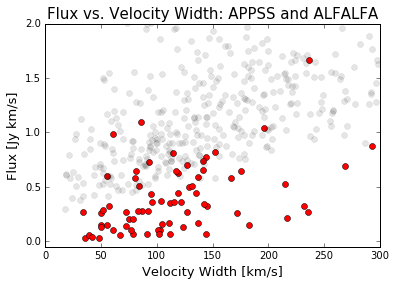

In [5]:
HI = data_alf['usedecdeg']
gooddec=(HI >= 33.5) & (HI <= 36.5)


#w50 from reduced slice
w50_appss=data_appss['W50']
flux_appss=data_appss['Flux']

#alfalfa data
flux_alf=data_alf['HIflux']
w50_alf=data_alf['W50']

good_w50_alf=w50_alf[gooddec]
good_flux_alf=flux_alf[gooddec]
good_w50_appss=w50_appss[(w50_appss > 0)]
good_flux_appss=flux_appss[(flux_appss > 0)]

#figure of the velocity vs. flux of the appss slice and the alfalfa data
plt.figure()
plt.plot(good_w50_appss, good_flux_appss,'ro')
plt.plot(good_w50_alf, good_flux_alf,'ko', alpha=.1) #only near dec 35, 1.5
plt.title('Flux vs. Velocity Width: APPSS and ALFALFA',fontsize=15)
plt.xlabel('Velocity Width [km/s]',fontsize=13)
plt.ylabel('Flux [Jy km/s]',fontsize=13)
pylab.ylim([-.05,2]) #change the range on the y axis
pylab.xlim([0,300]) #Change the range on the x axis 
fig = plt.gcf()

fig.savefig('flux_w50_both.pdf') 


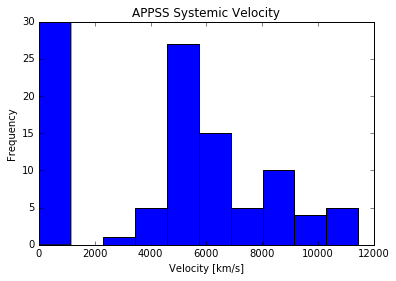

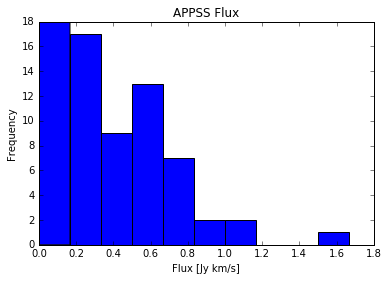

In [29]:
#systemic velocity frequency of just my slice
plt.figure(1)
plt.hist(v1)
plt.title("APPSS Systemic Velocity")
plt.xlabel("Velocity [km/s]")
plt.ylabel("Frequency")
pylab.ylim([0,30]) 

fig1 = plt.gcf()

#fig1.savefig('velocity_APPSS.pdf') 

#flux frequency of just my slice 
plt.figure(2)
plt.hist(flux_me)
plt.title("APPSS Flux")
plt.xlabel("Flux [Jy km/s]")
plt.ylabel("Frequency")
pylab.ylim([0,18]) 

fig2 = plt.gcf()

#fig2.savefig('flux_appss.pdf')

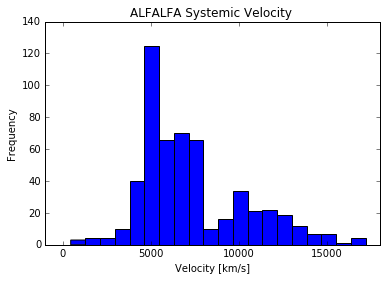

In [31]:
#this histogram is just of the systemic velocity of ALFALFA data in my slice's range
plt.figure()
plt.hist(good_v_alf,bins=20)#=remember good_v_alf was used to define data from ALFALFA that could fit in my slice

pylab.xlim([-1000,18000])

plt.title("ALFALFA Systemic Velocity ")
plt.xlabel("Velocity [km/s]")
plt.ylabel("Frequency")

fig = plt.gcf()

#fig.savefig('velocity_ALF.pdf') #uncomment to save figure

In [20]:
#where is the signal to noise ratio greater than 2?
s_n = data_appss['SN']
goodsn=s_n[np.where(s_n > 2.)]
np.size(goodsn)

62

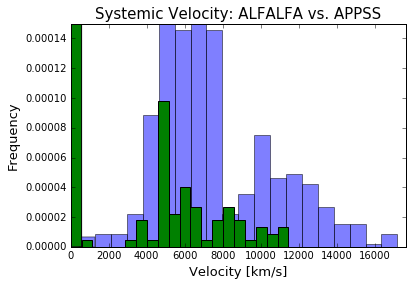

In [33]:
#histogram compares the velocity of my slice data and ALFALFA data in my slice's range
plt.figure()
plt.hist(good_v_alf,bins=20, alpha=.5, normed = True) #normalizes for fractional values
plt.hist(v1,bins=20, normed=True)

plt.title("Systemic Velocity: ALFALFA vs. APPSS", fontsize=15)
plt.xlabel("Velocity [km/s]",fontsize=13)
plt.ylabel("Frequency",fontsize=13)
pylab.xlim([0, 17600])
pylab.ylim([0,.00015]) 

fig = plt.gcf()

#fig.savefig('velocity_both_hist.pdf') #uncomment to save 

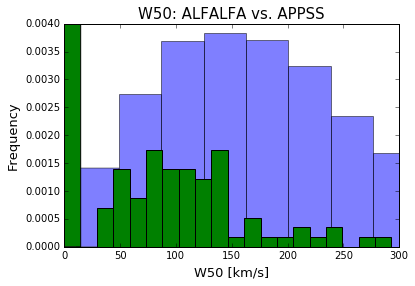

In [35]:
#this compares the w50 of my slice and ALFALFA,however, I did not limit the amount of ALFALFA displayed 
w50_me=data_appss['W50']
w50_alfalfa=data_alf['W50']

plt.figure()

plt.hist(w50_alfalfa, bins=20, alpha =.5, normed = True)
plt.hist(w50_me, bins=20, normed = True)
plt.title("W50: ALFALFA vs. APPSS",fontsize= 15)
plt.xlabel("W50 [km/s]", fontsize = 13)
plt.ylabel("Frequency", fontsize = 13)
pylab.ylim([0,.004]) 
pylab.xlim([0,300])

fig = plt.gcf()

#fig.savefig('w50_both_hist.pdf')